# LAB 9

In [1]:
import mysql.connector

# Your database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'lab9'
}

try:
    with mysql.connector.connect(**db_config) as connection:
        print("Connected to MySQL database!")
        # Perform your operations here

except mysql.connector.Error as e:
    print(f"Error connecting to MySQL: {e}")


Connected to MySQL database!


In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df= pd.read_csv('lab9_data.csv')
df.head()

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_95979/4221926817.py:4: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('lab9_data.csv')


,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),Flooring Type,Electricity Status,Maintenance Type,Maintenance Charges,Booking Amount,Landmark,Covered Area,Project Name,sqft Price,Carpet Area,Area Name,Property Uniqueness,Unit of Carpet Area,Society,Ownership Type,furnished Type,Bathroom,Parking,Facing,Amenities Facing,Transaction Type,Floor Data,Type of Property,City,bedroom,Data Referred From,floors,Water Status,Luxury Flat,Covered Area.1,Carpet Area Unit,isPrimeLocationProperty,Tenants Preference,Location,Property,covArea Unit,isLuxuryServiceProvided,Property Lifespan,balconies,Rera,Power Back Up,Lift,Rain Water Harvesting,Club House,Swimming Pool,Gymnasium,Park,Parking.1,Security,Water Storage,Private Terrace/Garden,Vaastu Compliant,Service/Goods Lift,Air Conditioned,Visitor Parking,Intercom Facility,Maintenance Staff,Waste Disposal,Laundry Service,Internet/Wi-Fi Connectivity,DTH Television Facility,RO Water System,Banquet Hall,Bar/Lounge,Cafeteria/Food Court,Conference Room,Piped Gas,Jogging and Strolling Track,Outdoor Tennis Courts,Mansion,Downtown,Skyline View,Wrap Around Balcony,Island Kitchen Layout,Full Glass Wall,House help accommodation,Concierge Services,Garden View,Marble flooring,Well Furnished,Modular Kitchen,Helipad,Private pool,Private Jaccuzi,Mini Cinema Theatre,Golf Course,Infinity Swimming Pool,Pool with temperature control,Sea facing,Skydeck,Earth quake resistant,Theme based Architectures,Health club with Steam / Jaccuzi,Large Clubhouse,Large Open space,Fingerprint Access,Grand Entrance lobby,Private Garage,Fireplace,Wine Cellar,Sky Villa,Water Front,Hilltop,Smart Home,Barbeque space,Kids play area,Library,Puja Room,Study,Servant Room,Store,Aerobics Room,Canopy Walk,Coffee Lounge & Restaurants,Dance Studio,Event Space & Amphitheatre,Flower Gardens,Guest Accommodation,Indoor Squash & Badminton Courts,Kids Play Area,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,Vitrified,No/Rare Powercut,Per sq. Unit Monthly,3.0,100000.0,Kalyan West Bapgaon,635.0,NaN,4960.0,375.0,Kalyan West,NaN,Sq-ft,Y,Freehold,Unfurnished,2.0,1 Covered,East,"Garden/Park, Pool",New Property,5 of 14 Floor,Apartment,Thane,1,Agent,14.0,Water Availability 24 Hours Available,F,635,Sq-ft,Y,Bachelors/Family,"Kalyan West, Thane",1 BHK Flat,Sq-ft,0,NaN,2.0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,Vitrified,No/Rare Powercut,Per sq. Unit Monthly,3.0,100000.0,Rajoli naka,579.0,Tata Amantra,10880.0,579.0,Kalyan West,NaN,Sq-ft,Y,Freehold,Unfurnished,2.0,1 Covered,East,Main Road,New Property,20 of 34 Floor,Apartment,Thane,2,Agent,34.0,Water Availability 24 Hours Available,F,579,Sq-ft,Y,Bachelors/Family,"Kalyan West, Thane",2 BHK Flat,Sq-ft,0,New Construction,NaN,Y,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,Vitrified,No/Rare Powercut,Monthly,1200.0,100000.0,This property has reputed scholl ints vicinity.,850.0,Sai Satyam Homes,6352.0,585.0,Kalyan West,East Facing Property,Sq-ft,Y,Freehold,Unfurnished,2.0,1 Open,East,"Garden/Park, Main Road",New Property,18 of 18 Floor,Apartment,Thane,2,Agent,18.0,Water Availability 24 Hours Ava

In [79]:
import pandas as pd
import mysql.connector

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'lab9'
}

# Columns to extract from CSV and their corresponding names in the database table
columns_to_insert = {
    'ID': 'Id',
    'Possession Status': 'PosessionStatus',
    'Availability Starts From': 'AvailibilityStartsFrom',
    'Floor No': 'FloorNo',
    'Commercial': 'Commercial',
    'Developer': 'Developer',
    'Approved Authority Name': 'ApprovedAuthorityName',
    'Units Available': 'UnitsAvailable',
    'Price': 'Price',
    'Price (English)': 'PriceEnglish',
    'Flooring Type': 'FlooringType',
    'Electricity Status': 'ElectricityStatus',
    'Maintenance Type': 'MaintenanceType',
    'Maintenance Charges': 'MaintenanceCharges',
    'Booking Amount': 'BookingAmount'
}

# Read the CSV file with appropriate settings to handle mixed types
file_path = 'lab9_data.csv'
data = pd.read_csv(file_path, usecols=columns_to_insert.keys(), na_values=['nan'], dtype=str)

try:
    # Establish connection to MySQL
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Insert values into PropertyInfo table
    for index, row in data.iterrows():
        formatted_row = [row[column] if pd.notnull(row[column]) else None for column in columns_to_insert.keys()]  # Arrange columns as per PropertyInfo
        
        sql = f"INSERT INTO PropertyInfo ({', '.join(columns_to_insert.values())}) VALUES ({', '.join(['%s'] * len(columns_to_insert))})"
        cursor.execute(sql, tuple(formatted_row))

    connection.commit()
    print("Data inserted successfully!")

except mysql.connector.Error as e:
    print(f"Error inserting data into MySQL: {e}")

finally:
    if 'connection' in locals() or 'connection' in globals():
        # Close the connection
        connection.close()
        print("MySQL connection closed")


Data inserted successfully!
MySQL connection closed


In [80]:
import pandas as pd
import mysql.connector

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'lab9'
}

# Columns to extract from CSV and their corresponding names in the database table
columns_to_insert_details = {
    'ID': 'Id',
    'Landmark': 'Landmark',
    'Covered Area': 'CoveredArea',
    'Project Name': 'ProjectName',
    'sqft Price ': 'SqftPrice',
    'Carpet Area': 'CarpetArea',
    'Area Name': 'AreaName',
    'Property Uniqueness': 'PropertyUniqueness',
    'Unit of Carpet Area': 'UnitOfCarpetArea',
    'Society': 'Society',
    'Ownership Type': 'OwnershipType',
    'furnished Type': 'FurnishedType',
    'Bathroom': 'Bathroom',
    'Parking': 'Parking'
}

# Read the CSV file with appropriate settings to handle mixed types
file_path = 'lab9_data.csv'
data = pd.read_csv(file_path, usecols=columns_to_insert_details.keys(), na_values=['nan'], dtype=str)

try:
    # Establish connection to MySQL
    connection = mysql.connector.connect(**db_config)
    cursor = connection.cursor()

    # Insert values into PropertyDetails table
    for index, row in data.iterrows():
        formatted_row = [row[column] if pd.notnull(row[column]) else None for column in columns_to_insert_details.keys()]  # Arrange columns as per PropertyDetails
        
        sql = f"INSERT INTO PropertyDetails ({', '.join(columns_to_insert_details.values())}) VALUES ({', '.join(['%s'] * len(columns_to_insert_details))})"
        cursor.execute(sql, tuple(formatted_row))

    connection.commit()
    print("Data inserted into PropertyDetails successfully!")

except mysql.connector.Error as e:
    print(f"Error inserting data into PropertyDetails in MySQL: {e}")

finally:
    if 'connection' in locals() or 'connection' in globals():
        # Close the connection
        connection.close()
        print("MySQL connection closed")


Data inserted into PropertyDetails successfully!
MySQL connection closed


### VISUALIZATION

### 2

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_95979/2329189148.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_info = pd.read_sql(query_info, connection)
/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_95979/2329189148.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_details = pd.read_sql(query_details, connection)
/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_95979/2329189148.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


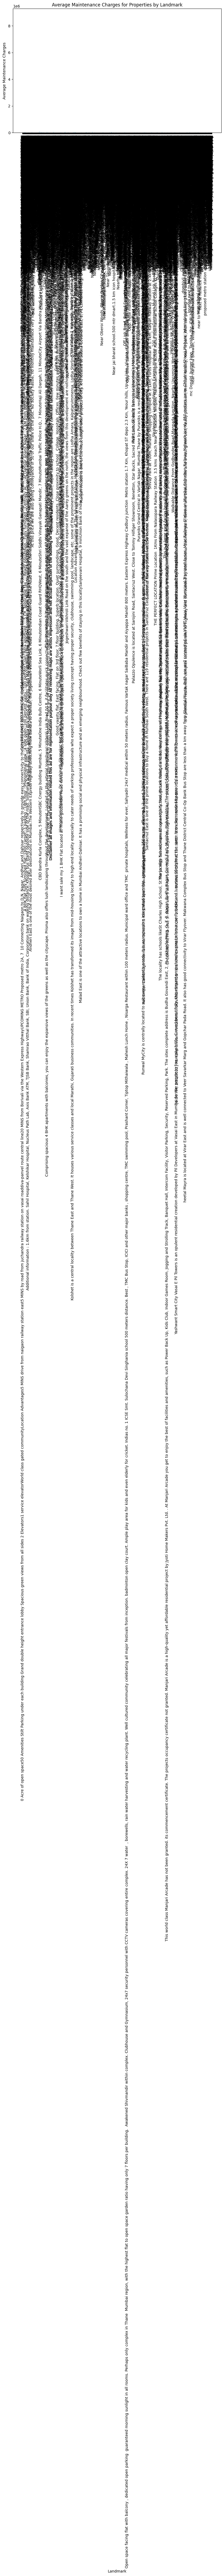

MySQL connection closed


In [91]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'lab9'
}

try:
    # Establish connection to MySQL
    connection = mysql.connector.connect(**db_config)

    # Fetching MaintenanceCharges column from PropertyInfo table
    query_info = "SELECT MaintenanceCharges FROM PropertyInfo"
    df_info = pd.read_sql(query_info, connection)

    # Fetching Landmark column from PropertyDetails table
    query_details = "SELECT Landmark FROM PropertyDetails"
    df_details = pd.read_sql(query_details, connection)

    # Drop rows with missing values
    df_info.dropna(subset=['MaintenanceCharges'], inplace=True)
    df_details.dropna(subset=['Landmark'], inplace=True)

    # Plotting the bar chart for average maintenance charges by Landmark
    plt.figure(figsize=(10, 6))
    df_merged = pd.concat([df_info, df_details], axis=1)
    avg_maintenance = df_merged.groupby('Landmark')['MaintenanceCharges'].mean().reset_index()
    plt.bar(avg_maintenance['Landmark'], avg_maintenance['MaintenanceCharges'], color='skyblue')
    plt.xlabel('Landmark')
    plt.ylabel('Average Maintenance Charges')
    plt.title('Average Maintenance Charges for Properties by Landmark')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

except mysql.connector.Error as e:
    print(f"Error accessing data from MySQL: {e}")

finally:
    if 'connection' in locals() or 'connection' in globals():
        # Close the connection
        connection.close()
        print("MySQL connection closed")


### 3

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_97351/3056961214.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_info = pd.read_sql(query_info, connection)
/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_97351/3056961214.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


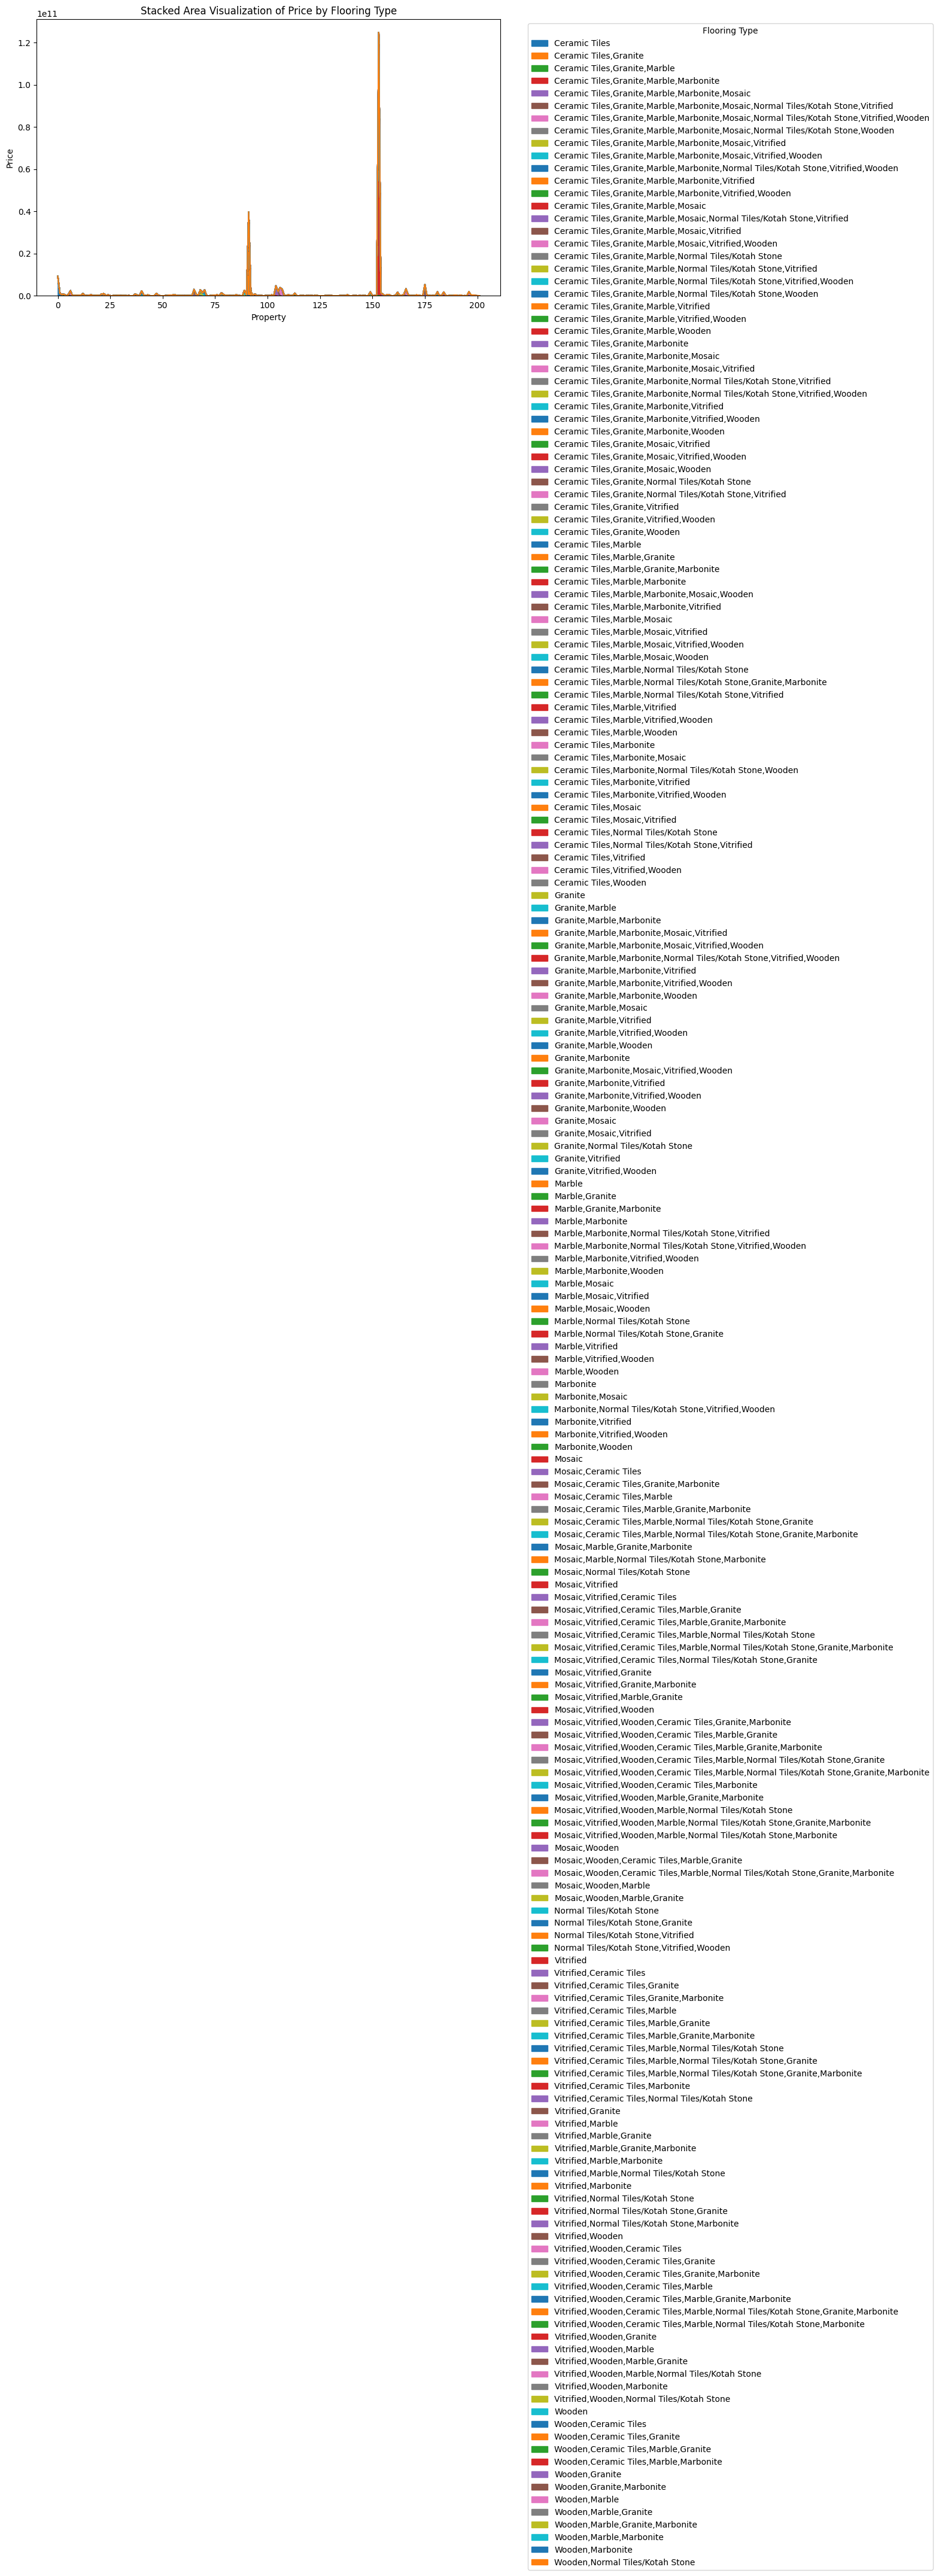

MySQL connection closed


In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Duke#7539',
    'database': 'lab9'
}

try:
    # Establish connection to MySQL
    connection = mysql.connector.connect(**db_config)

    # Fetching FlooringType and Price columns from PropertyInfo table
    query_info = "SELECT FlooringType, Price FROM PropertyInfo"
    df_info = pd.read_sql(query_info, connection)

    # Drop rows with missing values
    df_info.dropna(subset=['FlooringType', 'Price'], inplace=True)

    # Grouping by FlooringType and summing up the Price for each type
    grouped_data = df_info.groupby('FlooringType')['Price'].sum().reset_index()

    # Pivot the data to plot a stacked area chart
    pivot_data = grouped_data.pivot(columns='FlooringType', values='Price').fillna(0)

    # Create a stacked area chart
    pivot_data.plot(kind='area', stacked=True, figsize=(10, 6))
    plt.xlabel('Property')
    plt.ylabel('Price')
    plt.title('Stacked Area Visualization of Price by Flooring Type')
    plt.legend(title='Flooring Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

except mysql.connector.Error as e:
    print(f"Error accessing data from MySQL: {e}")

finally:
    if 'connection' in locals() or 'connection' in globals():
        # Close the connection
        connection.close()
        print("MySQL connection closed")


4

In [2]:
import pandas as pd
import folium

# Mock DataFrame (Replace this with your data retrieval)
data = {
    'AreaName': ['Area A', 'Area B', 'Area C'],  # Replace with your AreaName values
    'Price': [100, 200, 150]  # Replace with your corresponding Price values
}
df = pd.DataFrame(data)

# Example of mapping area names to specific geographic locations
# Replace this mapping with your geographic dataset or mapping
area_mapping = {
    'Area A': (40.7128, -74.0060),  # Latitude and Longitude for Area A (Example: New York)
    'Area B': (34.0522, -118.2437),  # Latitude and Longitude for Area B (Example: Los Angeles)
    'Area C': (41.8781, -87.6298)  # Latitude and Longitude for Area C (Example: Chicago)
}

# Create a map centered around a specific location
m = folium.Map(location=[40, -98], zoom_start=4)  # Centered around the US (Example)

# Iterate through the data and plot on the map
for area, price in zip(df['AreaName'], df['Price']):
    if area in area_mapping:
        folium.CircleMarker(
            location=area_mapping[area],
            radius=price * 0.001,  # Adjust radius based on the Price value
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f'{area}<br>Price: ${price}'
        ).add_to(m)

# Display the map
m
